In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2

In [3]:
## Loading all models

In [18]:
# Load haar cascade
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Load pickle files 
mean = pickle.load(open('mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('model_svm.pickle','rb'))
model_pca = pickle.load(open('pca_50.pickle','rb'))

print('Model loaded succesfully')

Model loaded succesfully


In [23]:
gender_pred = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [20]:
## Test data 

In [25]:
test_data_path = './data/male_000281.jpg'
color = 'bgr'
#step 1: Read image
img = cv2.imread(test_data_path)
#step 2: Convert into grayscale
if color == 'bgr':
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
else:
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#step 3:Crop the face using haar cascade 
faces = haar.detectMultiScale(gray,1.5,3)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#step 4:Normalization
    roi = gray[y:y+h,x:x+w]
    roi = roi/255.0
#step 5:Resize to 100x100
    if roi.shape[1]> 100:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
    else:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
#step 6:flattening 1x10000
    roi_reshape = roi_resize.reshape(1,-1)
#step 7: Substract with mean
    roi_mean = roi_reshape-mean
#step 8:Get eigen image
    eigen_image = modelca.transform(roi_mean)
#step 9: pass to ml model (svm)
    results = model_svm.predict_proba(eigen_image)[0]
#step 10:
    predict = results.argmax()
    score = results[predict]
#step 11:
    text = "%s : %0.2f"%(gender_pred[predict],score)
    cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    
cv2.imshow('Gender Prediction',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:

def pipeline_model(img,color='rgb'):
    if color == 'bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #step 3:Crop the face using haar cascade 
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    #step 4:Normalization
        roi = gray[y:y+h,x:x+w]
        roi = roi/255.0
    #step 5:Resize to 100x100
        if roi.shape[1]> 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
    #step 6:flattening 1x10000
        roi_reshape = roi_resize.reshape(1,-1)
    #step 7: Substract with mean
        roi_mean = roi_reshape-mean
    #step 8:Get eigen image
        eigen_image = model_pca.transform(roi_mean)
    #step 9: pass to ml model (svm)
        results = model_svm.predict_proba(eigen_image)[0]
    #step 10:
        predict = results.argmax()
        score = results[predict]
    #step 11:
        text = "%s : %0.2f"%(gender_pred[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img


In [32]:
from PIL import Image

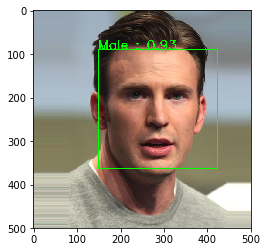

In [33]:
test_data_path = './data/male_000281.jpg'
color = 'bgr'
img = Image.open(test_data_path)
img = np.array(img)
img = pipeline_model(img)
plt.imshow(img)

## Apply pipeline model to video

In [42]:
cap = cv2.VideoCapture('./data/video.mp4')
while True:
    ret,frame = cap.read()
    
    if ret == False:
        break
    img = pipeline_model(frame,color='bgr')    
    cv2.imshow('Gender detection',img)
    if cv2.waitKey(20) == 27:
        break
        
cv2.destroyAllWindows()
cap.release

<function VideoCapture.release>